# Google Trends Data API

#### pytrend - трендинге анализ жасайтын python кітапханасы

In [1]:
pip install folium

In [1]:
import pandas as pd                        
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import us
import folium

#### Google арқылы байланыстыру

In [2]:
pytrend = TrendReq() 

# 1. Енгізілген жолдын интернеттекі қолданылуын шығару

In [3]:
input_data = input("Тақырыпты енгізіңіз: ")
pytrend.build_payload(kw_list=[input_data])
# Interest by Region
df = pytrend.interest_by_region()
df.head()

Тақырыпты енгізіңіз: Facebook


,Facebook
geoName,
Afghanistan,0
Albania,63
Algeria,72
American Samoa,0
Andorra,0


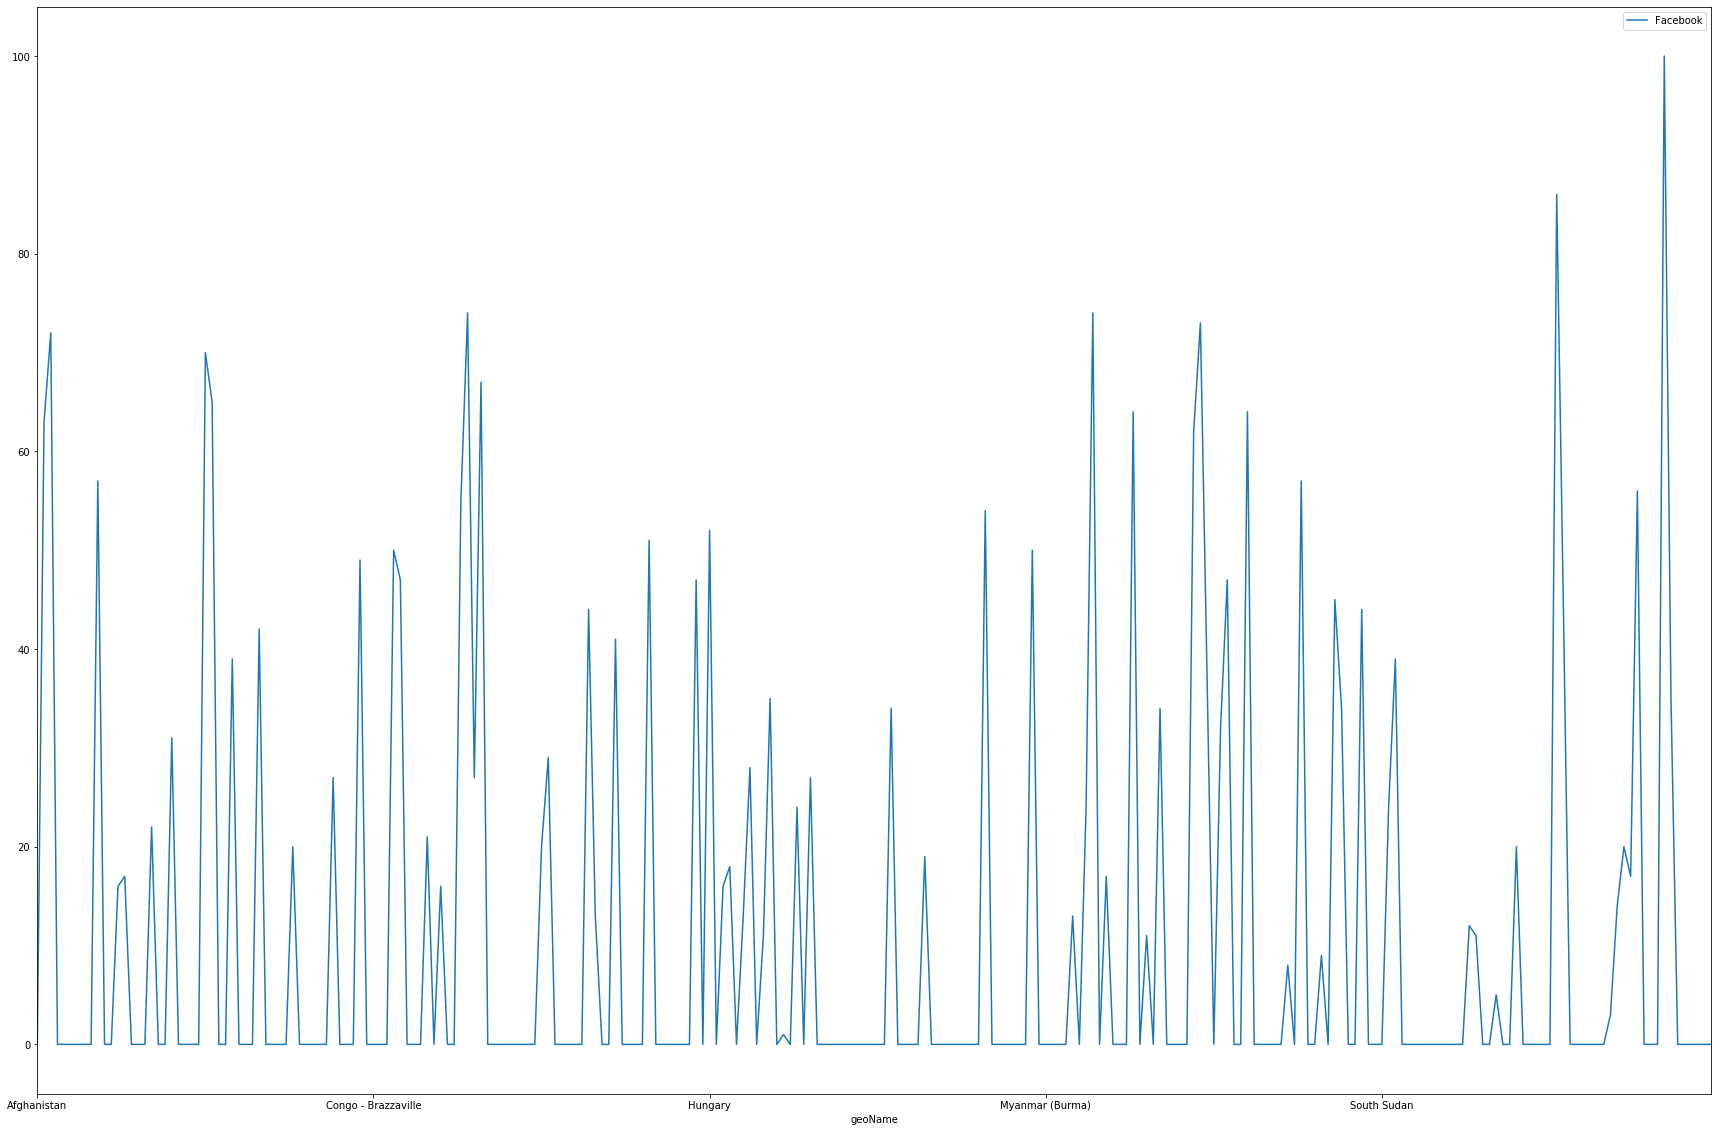

In [4]:
df.reset_index().plot(x='geoName', y=input_data, figsize=(30, 20))

In [5]:
data = df.groupby('geoName').all()

In [6]:
x1 = len(data[data[input_data]==1])
x2 = len(data[data[input_data]==0])
x1, x2

(77, 173)

## 1.1 Елдердегі қолданылуы
### True - қолданылады
### False - қолданылмайды

<BarContainer object of 1 artists>

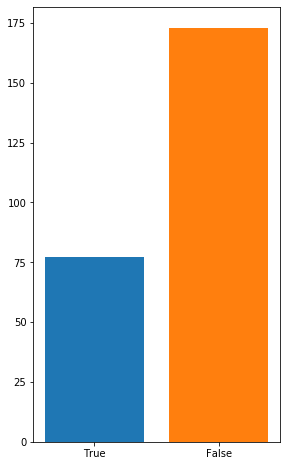

In [7]:
names = ['True', 'False']
values = [x1, x2]
color = ['red', 'green']

plt.figure(figsize=(15, 8))

plt.subplot(132)
plt.bar(names[0], values[0])
plt.bar(names[1], values[1])

# 2. Қазақстанда жиі ізделінген тақырыптар

### 2.1 Жиі қолданылған тақырыптарды анықтау

In [8]:
df = pytrend.top_charts(2019, hl='en-US', tz=300, geo='KZ')
df.head(10)

,title,exploreQuery
0,Игра престолов 8 сезон,
1,Переводчик казахско русский,
2,Мстители Финал,
3,Юлия Началова,
4,КХЛ,
5,Токаев,
6,Заворотнюк,
7,Зеленский,
8,ИП Пирогова,
9,Ветреный,


In [9]:
df.shape

(10, 2)

### 2.2 Қазақстандағы қолданылу санын анықтау

In [10]:
pytrend1 = TrendReq()
b = []
for i in df['title']:
    pytrend1.build_payload(kw_list=[i])
    a = pytrend1.interest_by_region().reset_index()
    a = a[a['geoName']=='Kazakhstan']
    b.append(int(a[i]))
df['count'] = b
df

,title,exploreQuery,count
0,Игра престолов 8 сезон,,100
1,Переводчик казахско русский,,100
2,Мстители Финал,,74
3,Юлия Началова,,54
4,КХЛ,,100
5,Токаев,,100
6,Заворотнюк,,45
7,Зеленский,,18
8,ИП Пирогова,,93
9,Ветреный,,58


### 2.3 Қазақстандағы қолданылу санын анықтау

In [11]:
pytrend1 = TrendReq()
c = []
for i in df['title']:
    pytrend1.build_payload(kw_list=[i])
    a = pytrend1.interest_by_region().reset_index()
    a = a[a['geoName']!='Kazakhstan']
    c.append(sum(a[i]))
df['world_count'] = c
df

,title,exploreQuery,count,world_count
0,Игра престолов 8 сезон,,100,468
1,Переводчик казахско русский,,100,0
2,Мстители Финал,,74,450
3,Юлия Началова,,54,657
4,КХЛ,,100,227
5,Токаев,,100,22
6,Заворотнюк,,45,523
7,Зеленский,,18,260
8,ИП Пирогова,,93,322
9,Ветреный,,58,485


### 2.4 Диаграмма тұрғызу

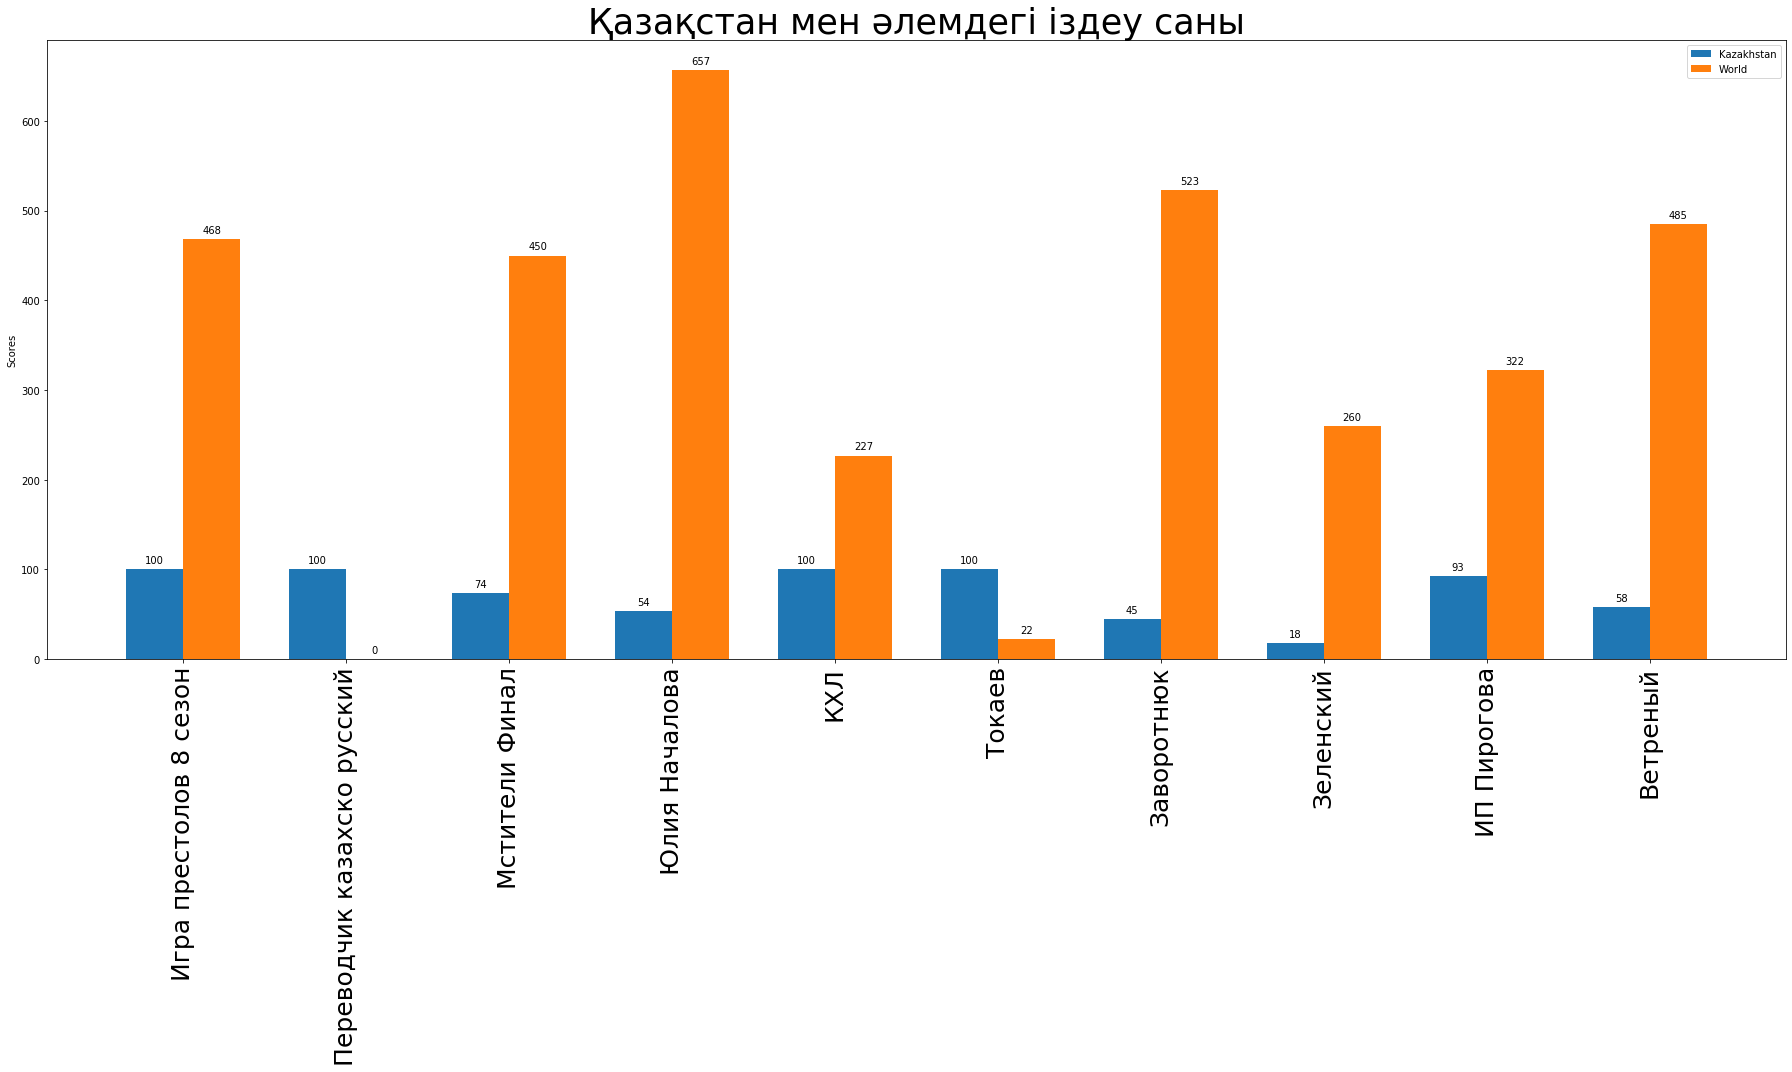

In [12]:
labels = df['title']
values1 = df['count']
values2 = df['world_count']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(25, 15))
rects1 = ax.bar(x - width/2, values1, width, label='Kazakhstan')
rects2 = ax.bar(x + width/2, values2, width, label='World')

ax.set_ylabel('Scores')
ax.set_title('Қазақстан мен әлемдегі іздеу саны', fontsize=35)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=25, rotation='vertical')
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 4),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# 3 Америкадағы штаттардын интернеттегі көрсеткіші 

In [13]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)
state_data = state_data.drop('Unemployment', axis=1)
state_data[:10]

,State
0,AL
1,AK
2,AZ
3,AR
4,CA
5,CO
6,CT
7,DE
8,FL
9,GA


In [14]:
qi = []
for i in state_data['State']:
    cd = eval('us.states.'+str(i)+'.name')
    pytrend = TrendReq() 
    pytrend.build_payload(kw_list=[cd])
    df = pytrend.interest_by_region()
    qi.append(sum(df[cd]))

In [15]:
print(qi)

[154, 515, 225, 124, 440, 220, 236, 132, 351, 169, 223, 133, 133, 180, 115, 153, 197, 191, 435, 159, 211, 139, 177, 194, 149, 464, 139, 429, 193, 371, 210, 332, 157, 195, 120, 154, 144, 239, 181, 143, 159, 149, 229, 146, 280, 274, 335, 172, 147, 182]


In [16]:
state_data['number']=qi
state_data.head(10)

,State,number
0,AL,154
1,AK,515
2,AZ,225
3,AR,124
4,CA,440
5,CO,220
6,CT,236
7,DE,132
8,FL,351
9,GA,169


In [17]:

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'number'],
    key_on='feature.id',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Жиі қолданылуы'
).add_to(m)

folium.LayerControl().add_to(m)

m

# 4. Белгілі бір уақыт аралығындағы тақырыптың қолданылуын есептейтін функция

In [18]:
def get_plot(key_words):
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload([key_words], timeframe='2020-04-01 2020-05-01',  gprop='',geo="US-NY")    
    df = pytrends.interest_over_time() 
    df['timestamp'] = df.index
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    sns.set()
    ax = sns.lineplot(df['timestamp'], df[key_words], label = key_words)
    plt.ylabel("Number of Searchers")
    ax.legend()

### 4.1 Kazakhstan, America, Russian, Chine сөздерін салыстыру графигі

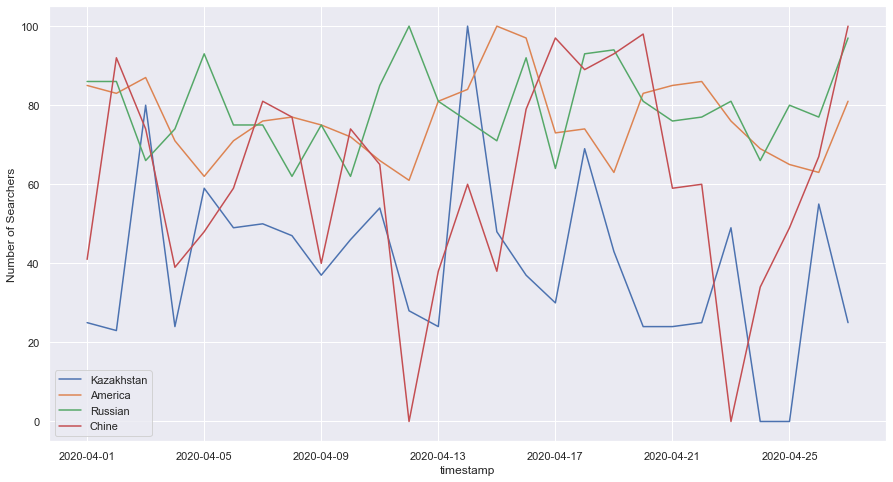

In [19]:
plt.figure(figsize=(15, 8))
get_plot("Kazakhstan")
get_plot("America")
get_plot("Russian")
get_plot("Chine")
plt.show()

# 5. 2011 мен 2020 жылдардағы жиі қолданылған тақырыптар

In [20]:
df2 = []
year = []
for i in range(2011, 2020):
    d = pytrend.top_charts(i, hl='en-US', tz=300, geo='GLOBAL')
    for j in d['title']:
        df2.append(j)
        year.append(i)
len(df2)
len(year)
df2 = pd.DataFrame({'title': df2, 'year': year})

In [21]:
df2

,title,year
0,Amazon Kindle Fire,2011
1,iPhone 4s,2011
2,Sidekick 4g,2011
3,Hp Touchpad,2011
4,Spb Shell 3d,2011
...,...,...
85,Game of Thrones,2019
86,Avengers: Endgame,2019
87,Joker,2019
88,Notre Dame,2019


###  5.1Қолданылу санын есептеу

In [22]:
count1 = []
for i in df2['title']:
    pytrend = TrendReq() 
    pytrend.build_payload(kw_list=[i])
    df = pytrend.interest_by_region()
    count1.append(sum(df[i]))

In [23]:
df2['count'] = count1
df2

,title,year,count
0,Amazon Kindle Fire,2011,558
1,iPhone 4s,2011,2594
2,Sidekick 4g,2011,314
3,Hp Touchpad,2011,2469
4,Spb Shell 3d,2011,1222
...,...,...,...
85,Game of Thrones,2019,2590
86,Avengers: Endgame,2019,2358
87,Joker,2019,1122
88,Notre Dame,2019,761


## 5.2 Тақырыптартың типің анықтау

In [43]:
types = []
for i in df2['title']:
    pytrend3 = TrendReq()
    suggestions_dict = pytrend3.suggestions(keyword=i)
    try:
        types.append(suggestions_dict[0]['type'])
    except:
        types.append('NaN')
print(types)
len(types)

['Tablet computer', 'Mobile phone', 'Smartphone', 'Tablet computer', 'Mobile application development company', 'Tablet computer', 'Mobile phone', 'NaN', 'Video game console', 'Tablet computer', 'Airline', 'Airline', 'Airline', 'Airline', 'Air carrier', 'Airline', 'Airline', 'Airline', 'Airline', 'Airline', 'South African sprinter', 'American football tight end', 'American football running back', 'American basketball player', '2015 film', 'Footballer', 'American basketball player', 'American basketball player', 'American football player', 'Ice hockey', 'American actor', 'Football competition', 'Disease', 'Airline', 'Topic', 'Mobile game', 'Austrian singer', 'River in England', '2019 film', 'Olympic games', 'American basketball player', 'Magazine', 'Online game', '2015 film', 'Football club', '2015 film', 'Video game', 'American professional wrestler', 'American television personality', '2014 film', 'Mobile game', 'Mobile phone', '45th U.S. President', 'American actor', 'Topic', 'English

90

## 5.3 Ұқсас тақырыптарды біріктіру

In [57]:
for i in range(0, len(types)):
    if 'film' in types[i]:
        types[i] = 'Film'
print(types)
len(types)

['Tablet computer', 'Mobile phone', 'Smartphone', 'Tablet computer', 'Mobile application development company', 'Tablet computer', 'Mobile phone', 'NaN', 'Video game console', 'Tablet computer', 'Airline', 'Airline', 'Airline', 'Airline', 'Air carrier', 'Airline', 'Airline', 'Airline', 'Airline', 'Airline', 'South African sprinter', 'American football tight end', 'American football running back', 'American basketball player', 'Film', 'Footballer', 'American basketball player', 'American basketball player', 'American football player', 'Ice hockey', 'American actor', 'Football competition', 'Disease', 'Airline', 'Topic', 'Mobile game', 'Austrian singer', 'River in England', 'Film', 'Olympic games', 'American basketball player', 'Magazine', 'Online game', 'Film', 'Football club', 'Film', 'Video game', 'American professional wrestler', 'American television personality', 'Film', 'Mobile game', 'Mobile phone', '45th U.S. President', 'American actor', 'Topic', 'English singer-songwriter', 'Fil

90

In [59]:
df2['types'] = types
df2

,title,year,count,types
0,Amazon Kindle Fire,2011,558,Tablet computer
1,iPhone 4s,2011,2594,Mobile phone
2,Sidekick 4g,2011,314,Smartphone
3,Hp Touchpad,2011,2469,Tablet computer
4,Spb Shell 3d,2011,1222,Mobile application development company
...,...,...,...,...
85,Game of Thrones,2019,2590,Drama series
86,Avengers: Endgame,2019,2358,Film
87,Joker,2019,1122,Character
88,Notre Dame,2019,761,"Cathedral in Paris, France"


## 5.4 Тақырып типтерінің жалпы қолданылу саны

In [74]:
df_t = pd.DataFrame()
df_t['count'] = df2.groupby(['types'])['count'].sum().values
df_t['types'] = df2.groupby(['types'])['count'].sum().index
df_t[:10]

,count,types
0,261,2017 hurricane
1,1033,45th U.S. President
2,498,Air carrier
3,4152,Airline
4,6076,American actor
5,2846,American actress
6,3771,American basketball player
7,1082,American chef
8,3031,American comic book writer
9,327,American football player


In [82]:
df_t = df_t.sort_values(by=['count'],ascending=False)
df_t[:10]

,count,types
28,20189,Film
37,13659,Mobile phone
46,7067,Tablet computer
4,6076,American actor
38,5115,NaN
3,4152,Airline
48,3844,Topic
6,3771,American basketball player
47,3671,Theoretical physicist
17,3380,American web television series


## 5.5 Тақырыптарды топтарға бөлу
#### 1 - жиі қолданылғандар
#### 2 - орташа қолданылғандар
#### 3 - аз қолданылғандар

In [96]:
number = []
for i in df2['types']:
    if i == 'NaN':
        number.append(3)
    else:
        if i in np.array(df_t['types'][:10]):
            number.append(1)
        elif i in np.array(df_t['types'][10:27]):
            number.append(2)
        elif i in np.array(df_t['types'][27:]):
            number.append(3)
print(number)

[1, 1, 3, 1, 2, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 1, 3, 1, 2, 2, 2, 1, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 3, 2, 1, 3, 1, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 1, 3, 3, 1, 3, 3, 3, 2, 1, 3, 3, 3]


In [98]:
df2['number'] = number
df2

,title,year,count,types,number
0,Amazon Kindle Fire,2011,558,Tablet computer,1
1,iPhone 4s,2011,2594,Mobile phone,1
2,Sidekick 4g,2011,314,Smartphone,3
3,Hp Touchpad,2011,2469,Tablet computer,1
4,Spb Shell 3d,2011,1222,Mobile application development company,2
...,...,...,...,...,...
85,Game of Thrones,2019,2590,Drama series,2
86,Avengers: Endgame,2019,2358,Film,1
87,Joker,2019,1122,Character,3
88,Notre Dame,2019,761,"Cathedral in Paris, France",3


## 6.1 Dataset-ті х пен у-ке бөлу

In [238]:
x = df2.drop(['number', 'title', 'year'], axis=1)
y = df2['number']
x

,count,types
0,558,Tablet computer
1,2594,Mobile phone
2,314,Smartphone
3,2469,Tablet computer
4,1222,Mobile application development company
...,...,...
85,2590,Drama series
86,2358,Film
87,1122,Character
88,761,"Cathedral in Paris, France"


## 6.2 х-ке түрлендіру жасау

In [186]:
from sklearn import preprocessing

#### LabelEncoder

In [239]:
le = preprocessing.LabelEncoder()
x.loc[0:,['types']] = x.loc[0:,['types']].apply(le.fit_transform)
x

,count,types
0,558,46
1,2594,37
2,314,43
3,2469,46
4,1222,35
...,...,...
85,2590,25
86,2358,28
87,1122,21
88,761,20


#### MinMaxScaler

In [188]:
min_max_scaler = preprocessing.MinMaxScaler()
x.loc[0:,['count']] = min_max_scaler.fit_transform(x.loc[0:,['count']])
x

,count,types
0,0.107851,46
1,0.676725,37
2,0.039676,43
3,0.641799,46
4,0.293378,35
...,...,...
85,0.675608,25
86,0.610785,28
87,0.265437,21
88,0.164571,20


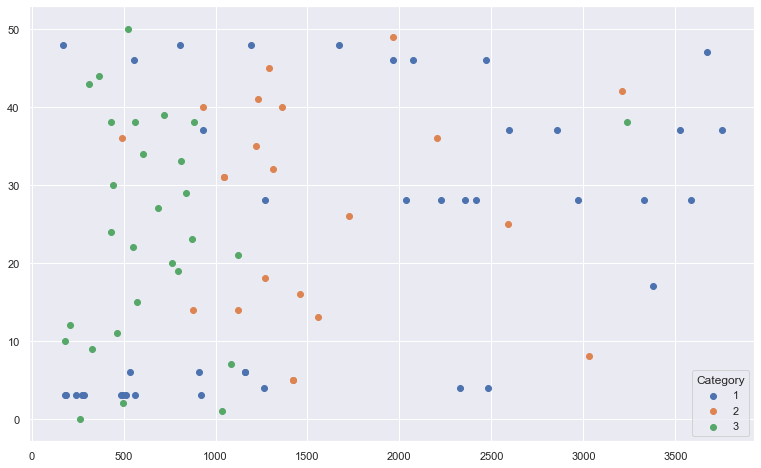

In [287]:
fig2, axs2 = plt.subplots(figsize=(13, 8), sharey=True)
axs2.scatter(x['count'][y==1], x['types'][y==1])
axs2.scatter(x['count'][y==2], x['types'][y==2])
axs2.scatter(x['count'][y==3], x['types'][y==3])
plt.legend(title='Category', labels=[1, 2, 3])

### 6.3 х пен у-ті train, test-ке бөлу

In [189]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(x, y, test_size=0.2)
X_train

,count,types
51,0.937133,37
69,0.106175,22
27,0.276334,6
35,0.568036,36
42,0.331936,40
...,...,...
74,0.305951,18
12,0.108969,3
21,0.081308,11
39,0.152557,39


    ## 7 RandomForestClassifier

In [303]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

C:\Users\Yerniyaz\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [304]:
Y_pred = rfc.predict(X_valid)
Y_pred

array([1, 3, 3, 3, 1, 2, 1, 1, 1, 3, 2, 1, 1, 2, 1, 2, 3, 1], dtype=int64)

In [305]:
from sklearn import metrics
rfc.score(X_valid,Y_valid)

0.9444444444444444

In [306]:
print(metrics.classification_report(Y_valid,Y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      0.80      0.89         5
           3       0.80      1.00      0.89         4

    accuracy                           0.94        18
   macro avg       0.93      0.93      0.93        18
weighted avg       0.96      0.94      0.94        18



### Accuracy

In [307]:
print("accuracy="+str(metrics.accuracy_score(Y_valid, Y_pred)))

accuracy=0.9444444444444444


Text(0.5, 0.98, 'Салыстыру')

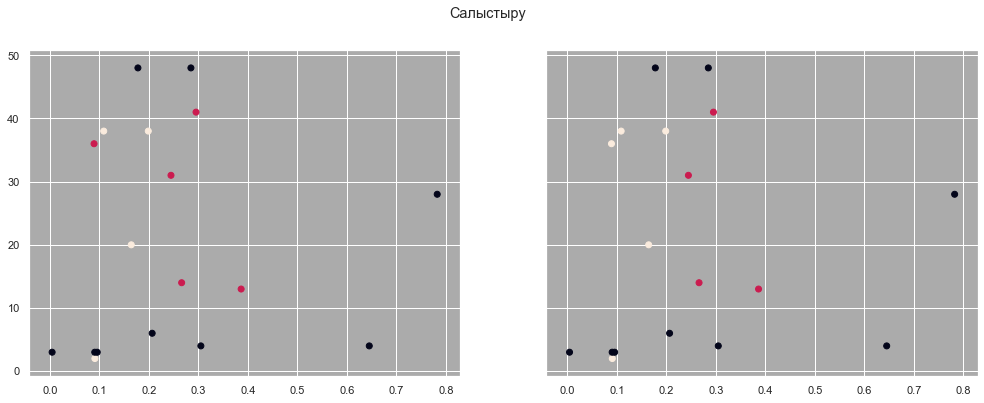

In [308]:
fig4, axs4 = plt.subplots(1, 2, figsize=(17, 6), sharey=True)
axs4[0].scatter(X_valid['count'], X_valid['types'], c=Y_valid)
axs4[1].scatter(X_valid['count'], X_valid['types'], c=Y_pred)
axs4[0].patch.set_facecolor('#ababab')
axs4[1].patch.set_facecolor('#ababab')
fig4.suptitle('Салыстыру')